In [0]:
import nltk
#nltk.download('popular')

In [0]:
import csv
import pandas as pd


Importing all the reviews from the reviews.csv file

In [0]:
df= pd.read_csv('/content/reviews.csv', delimiter=',',header=0)


Extracting only the review texts  column from the dataframe and storing it to a list

In [0]:
prep_text=[]
for i in range(len(df)):
  review = str(df.loc[i,'reviews.text'])
  prep_text.append(review)

Vectorization of the text with in built preprocessing of all the review texts

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=None,lowercase=True,stop_words='english') # Count Vectorization of the corpus after lowering the case and eliminating stopwords 
#Fitting count vectorizer
td = cv.fit_transform(prep_text) 
#getting the terms(features) generated by count vectorizer
terms = cv.get_feature_names()

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=15,  max_iter=15,learning_method='online',
learning_offset=15,random_state=1234) # using the LDA method in Sklearn library , we can specify the number of topics here, which is usually determined based on heuristics.
ldaTransform = lda.fit_transform(td)

Topic#  1
tonic,fever,heals,tree,schweppes,weeks,ago,40,lasts,protects,mustard,finger,cracking,boyfriend,horrible,label,jack,waters,drank,tonics,ve,black,glass,soothes,packed

Topic#  2
bitters,work,sores,better,orange,drinks,great,life,awesome,favorite,angostura,need,flavor,day,daily,addition,ll,new,night,cocktails,pleased,putting,car,gift,bring

Topic#  3
carmex,lips,lip,balm,chapped,purse,ve,best,love,buy,sore,tried,bed,chap,healing,relief,balms,season,50,tub,protection,healed,mom,home,bathroom

Topic#  4
diet,stores,true,rose,mixing,area,california,ok,clam,delivered,compares,flavor,slice,noticed,original,started,bucket,enjoying,tried,longer,jb,margarita,happy,black,summer

Topic#  5
fermentation,beer,bourbon,week,best,brand,beam,matter,kit,ice,straight,days,yellow,head,takes,hand,brewing,batch,outstanding,subtle,jim,alot,secondary,smooth,sick

Topic#  6
ginger,drink,whiskey,pinot,party,ale,ll,jim,wrong,wonders,thanks,time,tasted,cases,sour,noir,tried,let,cherry,bourbon,purchase,14,

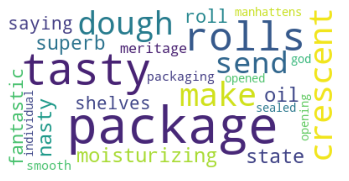

In [21]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

terms_count = 25 #declaring number of terms we need per topic
#Looping over lda components to get topics and their related terms with high probabilities
for idx,topic in enumerate(lda.components_):    
    print('Topic# ',idx+1)
    topic_terms_sorted = [[terms[i], topic[i]] for i in topic.argsort()[:-terms_count -1:-1]] #sorting according to the probabilities related to each topic
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])# collecting first 25 topic words
    print(','.join( word for word in topic_words)) 
    print("")
    dict_word_frequency = {} # declaring a dictionary for storing each term with their proabilities
  
    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]    
    wcloud = WordCloud(background_color="white",mask=None, max_words=100,max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')
    wcloud.generate_from_frequencies(dict_word_frequency)   # generating the wordclouds for each topic    
    plt.imshow(wcloud)
    plt.axis("off")
   # plt.savefig("Topic#"+str(idx+1), format="png")

In [15]:
print(lda.components_[3,5])

0.06670886575386709
